<a href="https://www.kaggle.com/code/headerstang/the-impact-of-big-data-analytics-in-healthcare?scriptVersionId=181164490" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# The Impact of Big Data Analytics in Healthcare

Welcome to the The Impact of Big Data Analytics in Healthcare !

This notebook is dedicated to the task of disease prediction based on a given dataset. The primary goal of this notebook is to build predictive models that can accurately identify and predict the occurrence of specific diseases.


**Notebook Steps:**

1. Data Loading
2. Data Exploration
3. Advanced Data Visualization
4. Model Training and Evaluation
5. Model Comparison and Selection
6. Prediction and Interpretation
7. Conclusion and Recommendations


**Explanation:**


The notebook follows a structured approach to disease prediction, starting with data loading and exploration. Advanced data visualization techniques are then applied to gain insights into the dataset. Models are trained and evaluated using machine learning algorithms, and the best-performing model is selected. The chosen model is used for predicting disease occurrence on new data, and the results are interpreted to understand the factors influencing the predictions. Finally, the notebook concludes with recommendations based on the analysis results.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from matplotlib.colors import ListedColormap


In [2]:
df = pd.read_csv("../input/disease-prediction-using-machine-learning/Training.csv")
df.drop('Unnamed: 133', axis=1, inplace=True)
test=pd.read_csv("../input/disease-prediction-using-machine-learning/Testing.csv") 
train=pd.read_csv("../input/disease-prediction-using-machine-learning/Training.csv")

In [3]:
train.sample(n=1)
#This will indicate any random 1 data will be retreived 

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
4391,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Drug Reaction,NaN


In [4]:
#This will give us encapsulation of data 
data = pd.concat([train, test])


In [5]:
#This will give us randome sample data 
data.sample(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
2410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
3648,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,Impetigo,NaN
1559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Hyperthyroidism,NaN
4682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Gastroenteritis,NaN
1155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Hypoglycemia,NaN
3385,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,Hepatitis E,NaN
3475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Hypothyroidism,NaN
1287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Peptic ulcer diseae,NaN
1018,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,hepatitis A,NaN


# Exploratory Data Analysis (EDA)

In [6]:
print(df.describe())
print('---------------------------------------------------------------')
print(df.info())
print('---------------------------------------------------------------')
print(df.columns)
print('---------------------------------------------------------------')

           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593 

**Summary of the Dataset:**
        
Number of Entries (Rows): 4920
Number of Columns: 133
    
    
**Column Information:**
    
Column Names: itching, skin_rash, nodal_skin_eruptions, continuous_sneezing, shivering, chills, and more...
Data Types: 132 columns with integer values, 1 column with object (prognosis)

    
**Data Description:**

Count, Mean, Standard Deviation, Minimum, 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum values are available for each column.

In [7]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [8]:
df['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

# Data Visualization

**Pie Chart**

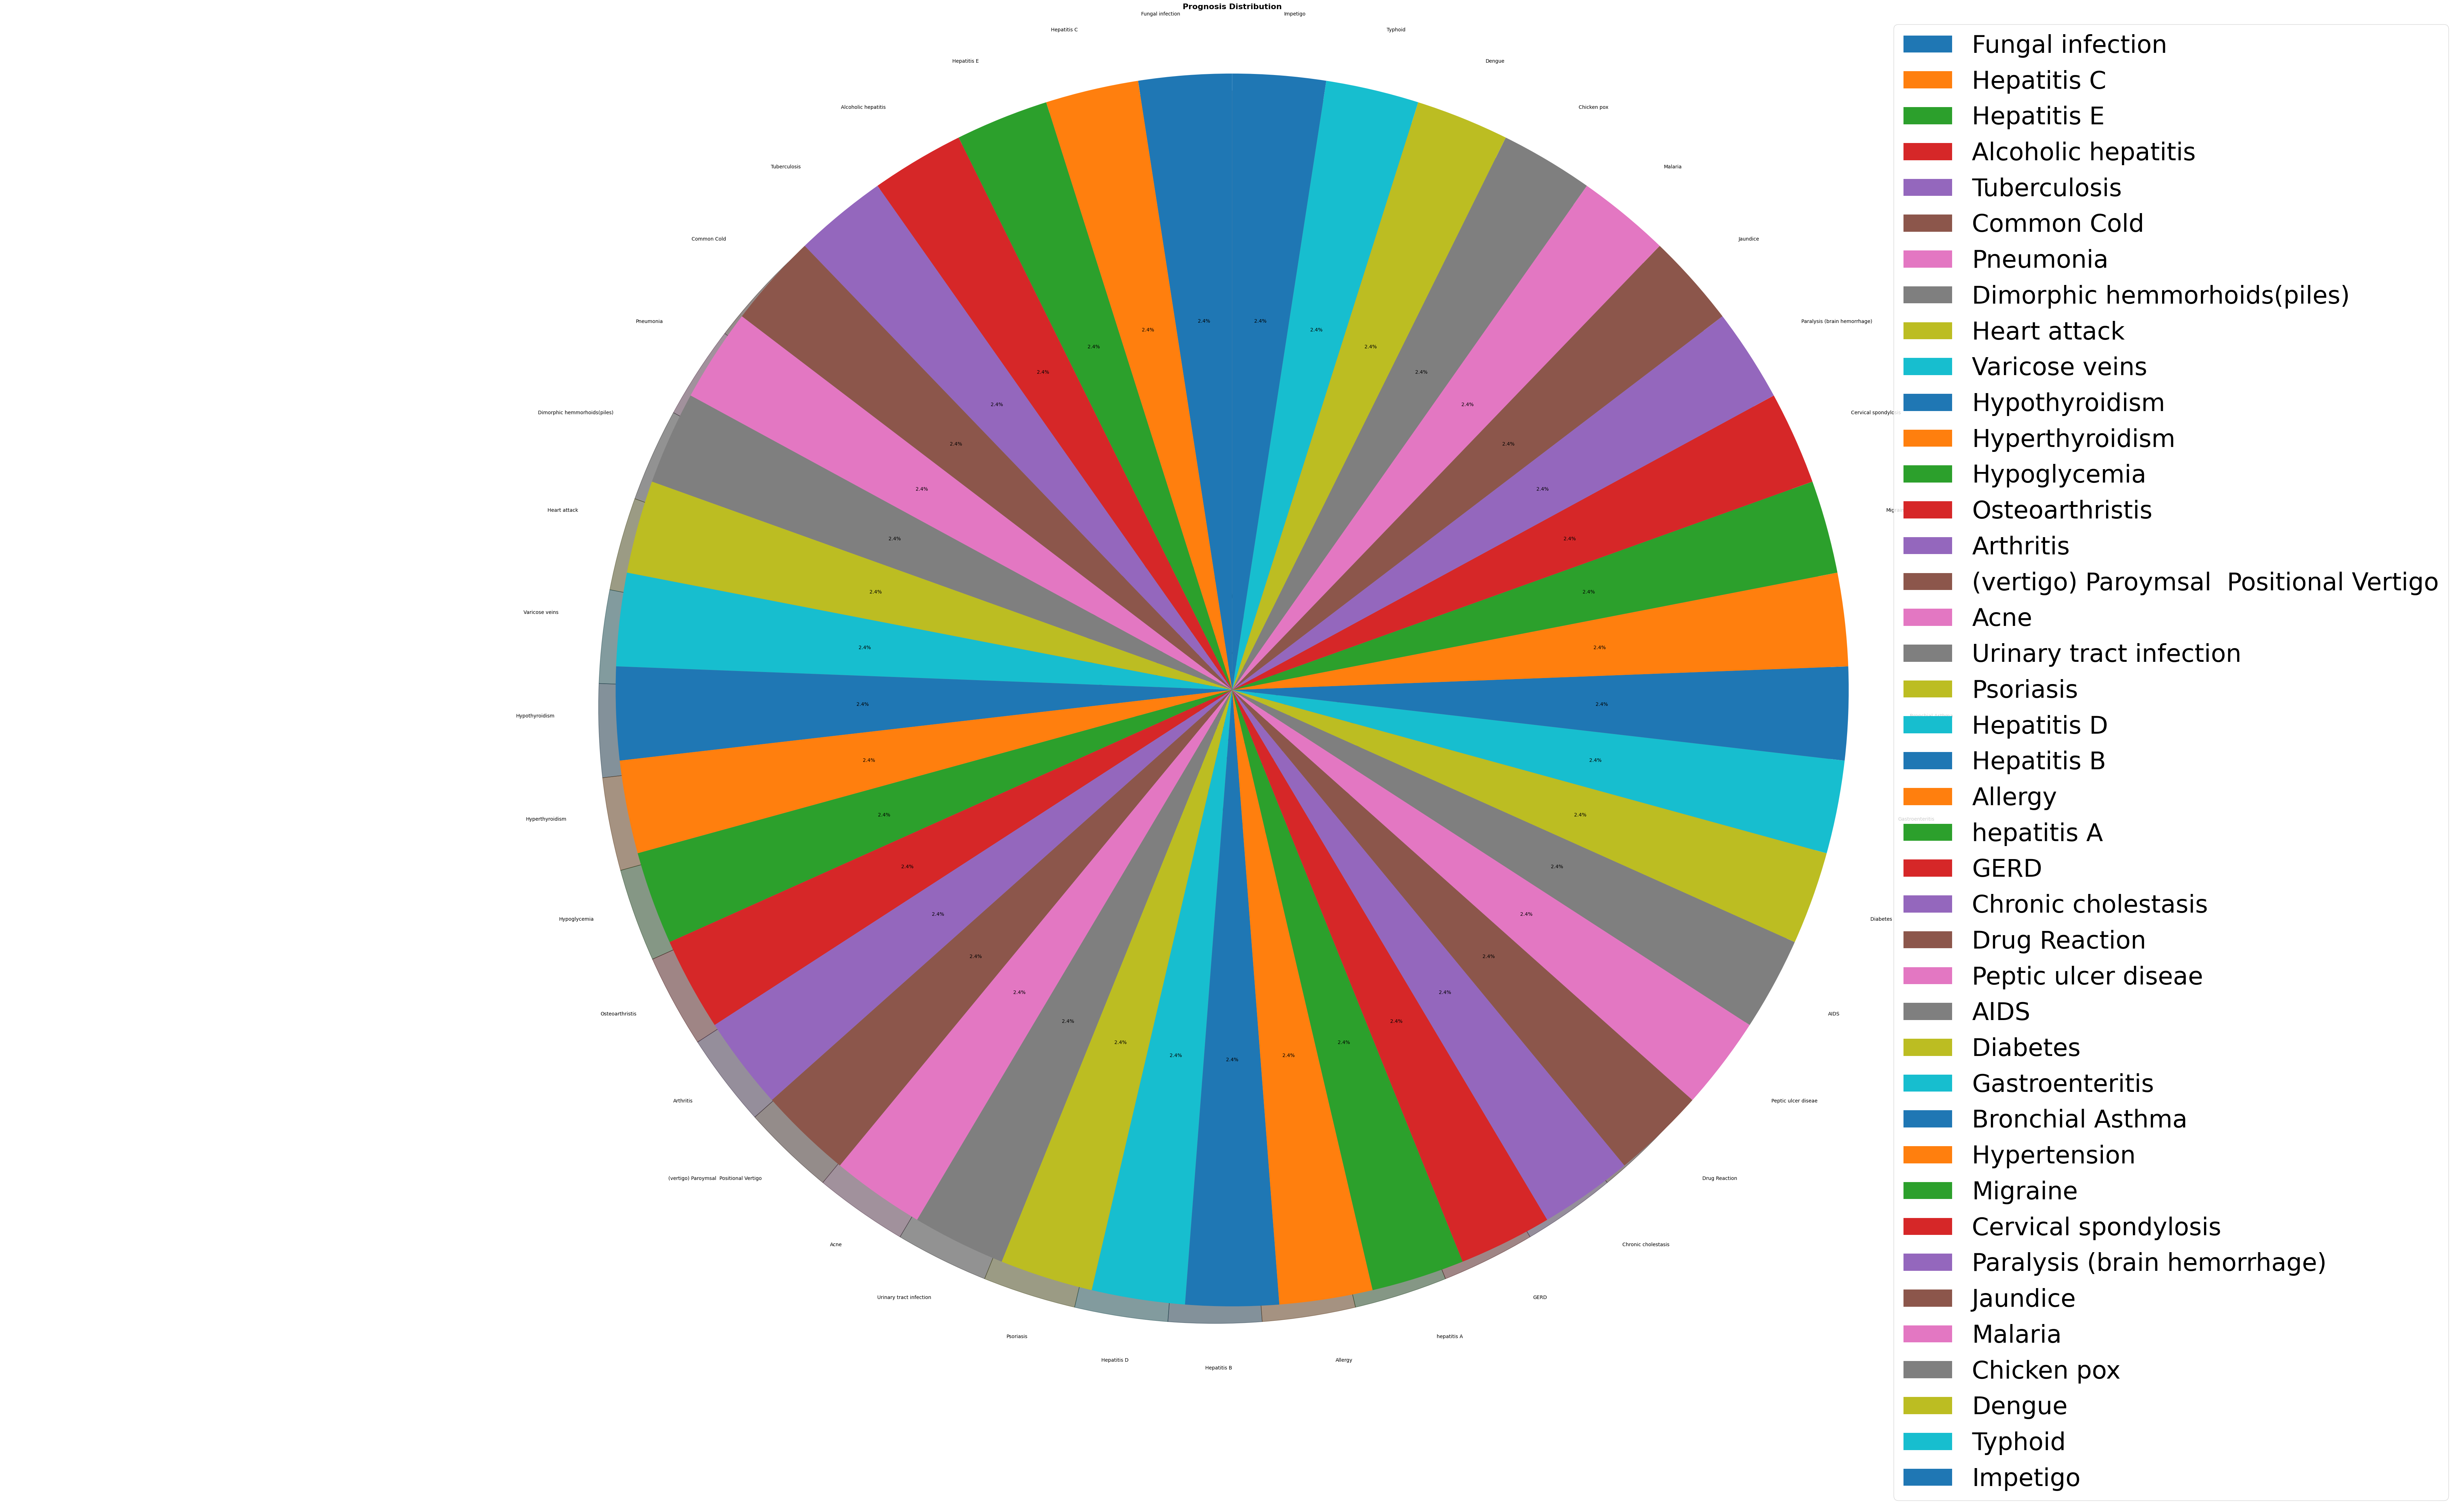

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(90, 50))

category_counts = df['prognosis'].value_counts()


plt.pie(category_counts, labels=category_counts.index,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Prognosis Distribution', fontsize=16, fontweight='bold')
plt.legend(category_counts.index, loc='best', fontsize=50)
plt.axis('equal')

plt.show()

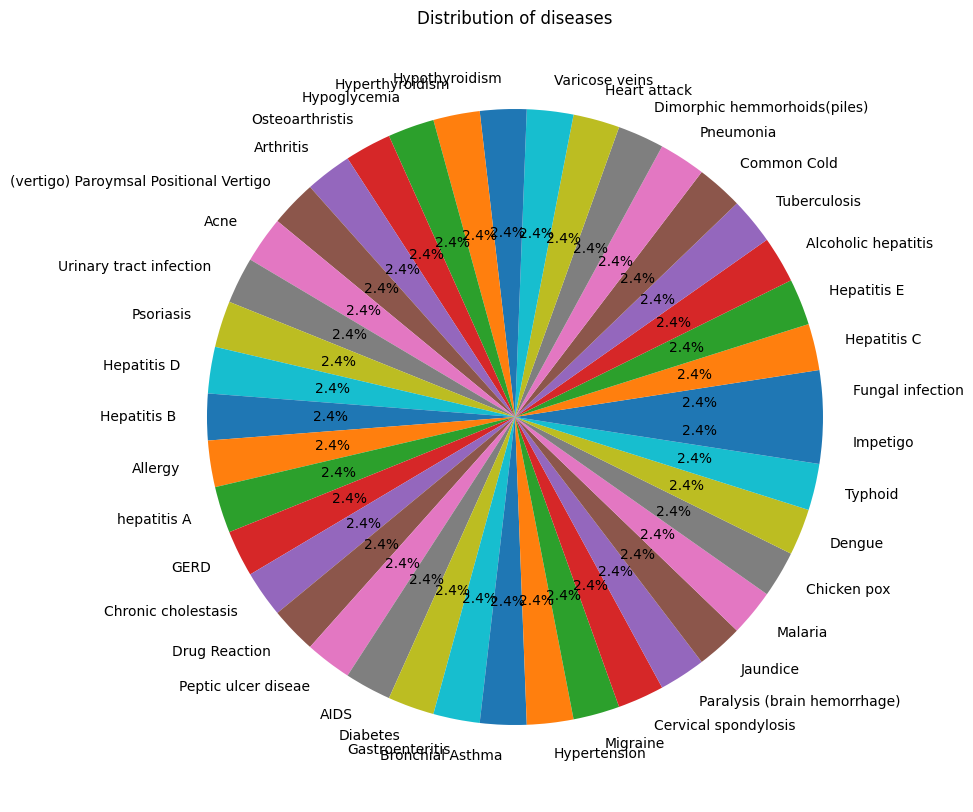

In [10]:
diseases = ["Fungal infection", "Hepatitis C", "Hepatitis E", "Alcoholic hepatitis", "Tuberculosis", "Common Cold", "Pneumonia", "Dimorphic hemmorhoids(piles)", "Heart attack", "Varicose veins", "Hypothyroidism", "Hyperthyroidism", "Hypoglycemia", "Osteoarthristis", "Arthritis", "(vertigo) Paroymsal Positional Vertigo", "Acne", "Urinary tract infection", "Psoriasis", "Hepatitis D", "Hepatitis B", "Allergy", "hepatitis A", "GERD", "Chronic cholestasis", "Drug Reaction", "Peptic ulcer diseae", "AIDS", "Diabetes", "Gastroenteritis", "Bronchial Asthma", "Hypertension", "Migraine", "Cervical spondylosis", "Paralysis (brain hemorrhage)", "Jaundice", "Malaria", "Chicken pox", "Dengue", "Typhoid", "Impetigo"]

cases = [120] * len(diseases)

plt.figure(figsize=(10, 10))
plt.pie(cases, labels=diseases, autopct='%1.1f%%')
plt.title("Distribution of diseases")
plt.show()

**Box Plot**

<Axes: title={'center': 'skin_rash'}, xlabel='itching'>

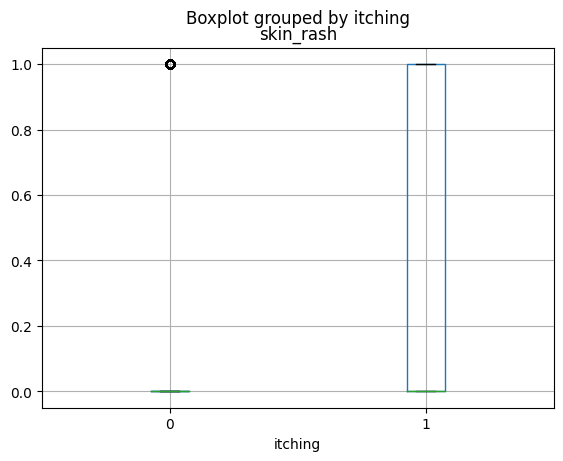

In [11]:
# What we are expecting from visualization. ? 
data.boxplot(column ='skin_rash', by='itching') #boxplot shows outlier, median,Q3,Q1

<Axes: >

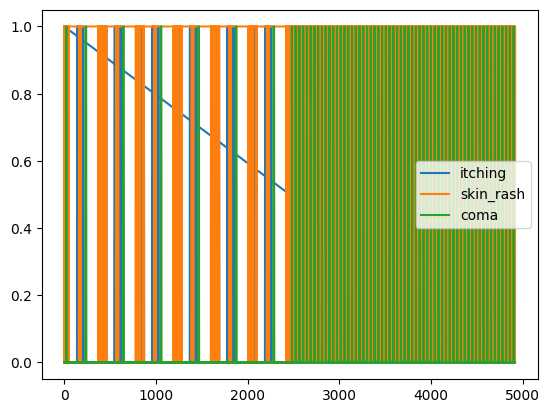

In [12]:
data1 =data.loc[:,["itching","skin_rash","coma"] ]
data1.plot()

**Pair Plot**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


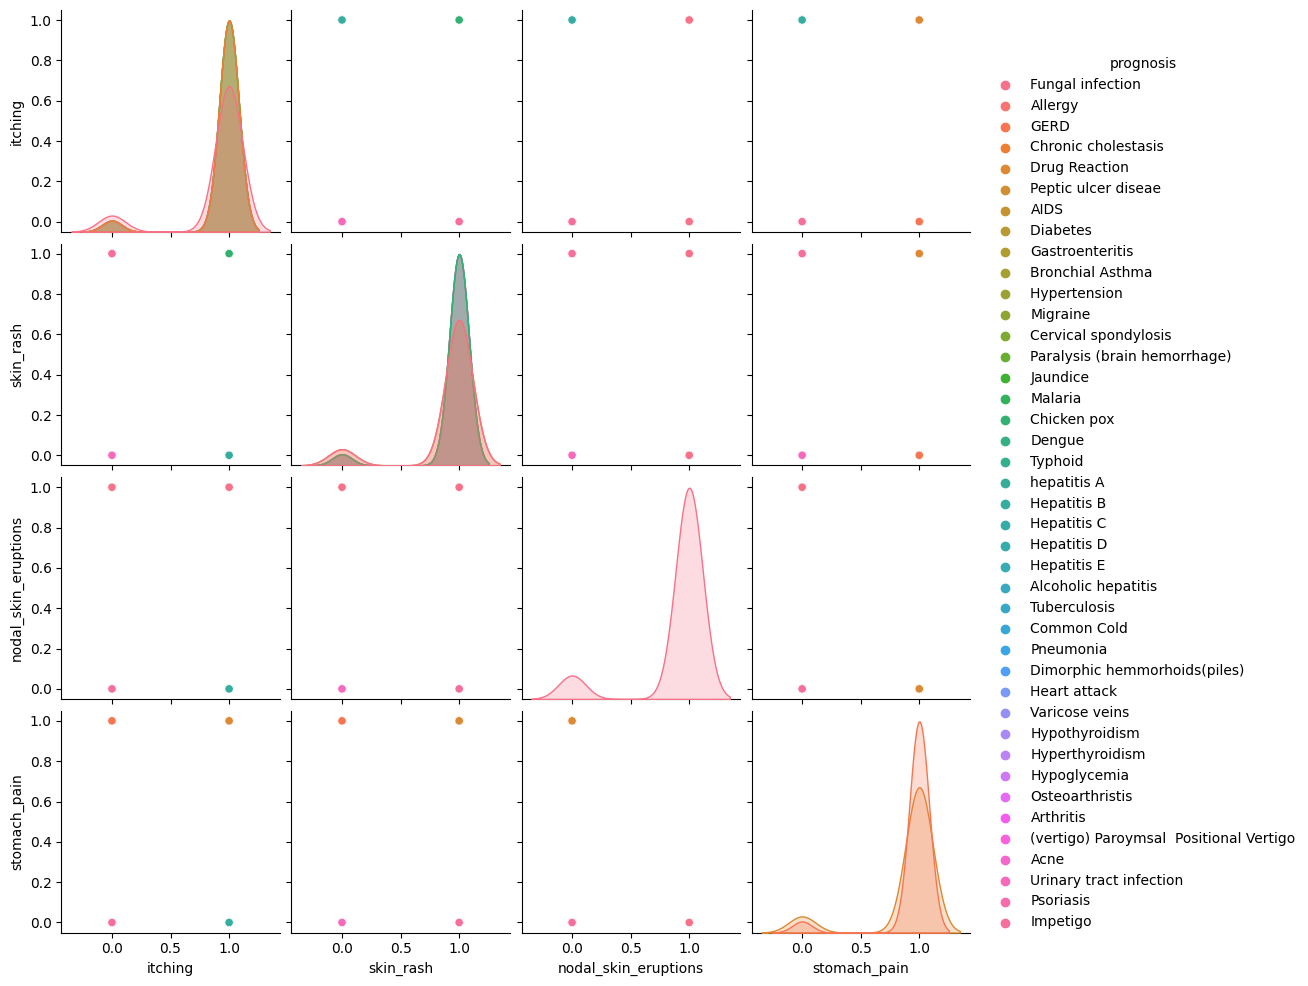

In [13]:
selected_columns = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'stomach_pain', 'prognosis']

train_selected = train[selected_columns]

sns.pairplot(train_selected, hue='prognosis')

plt.show()

**Histogram**

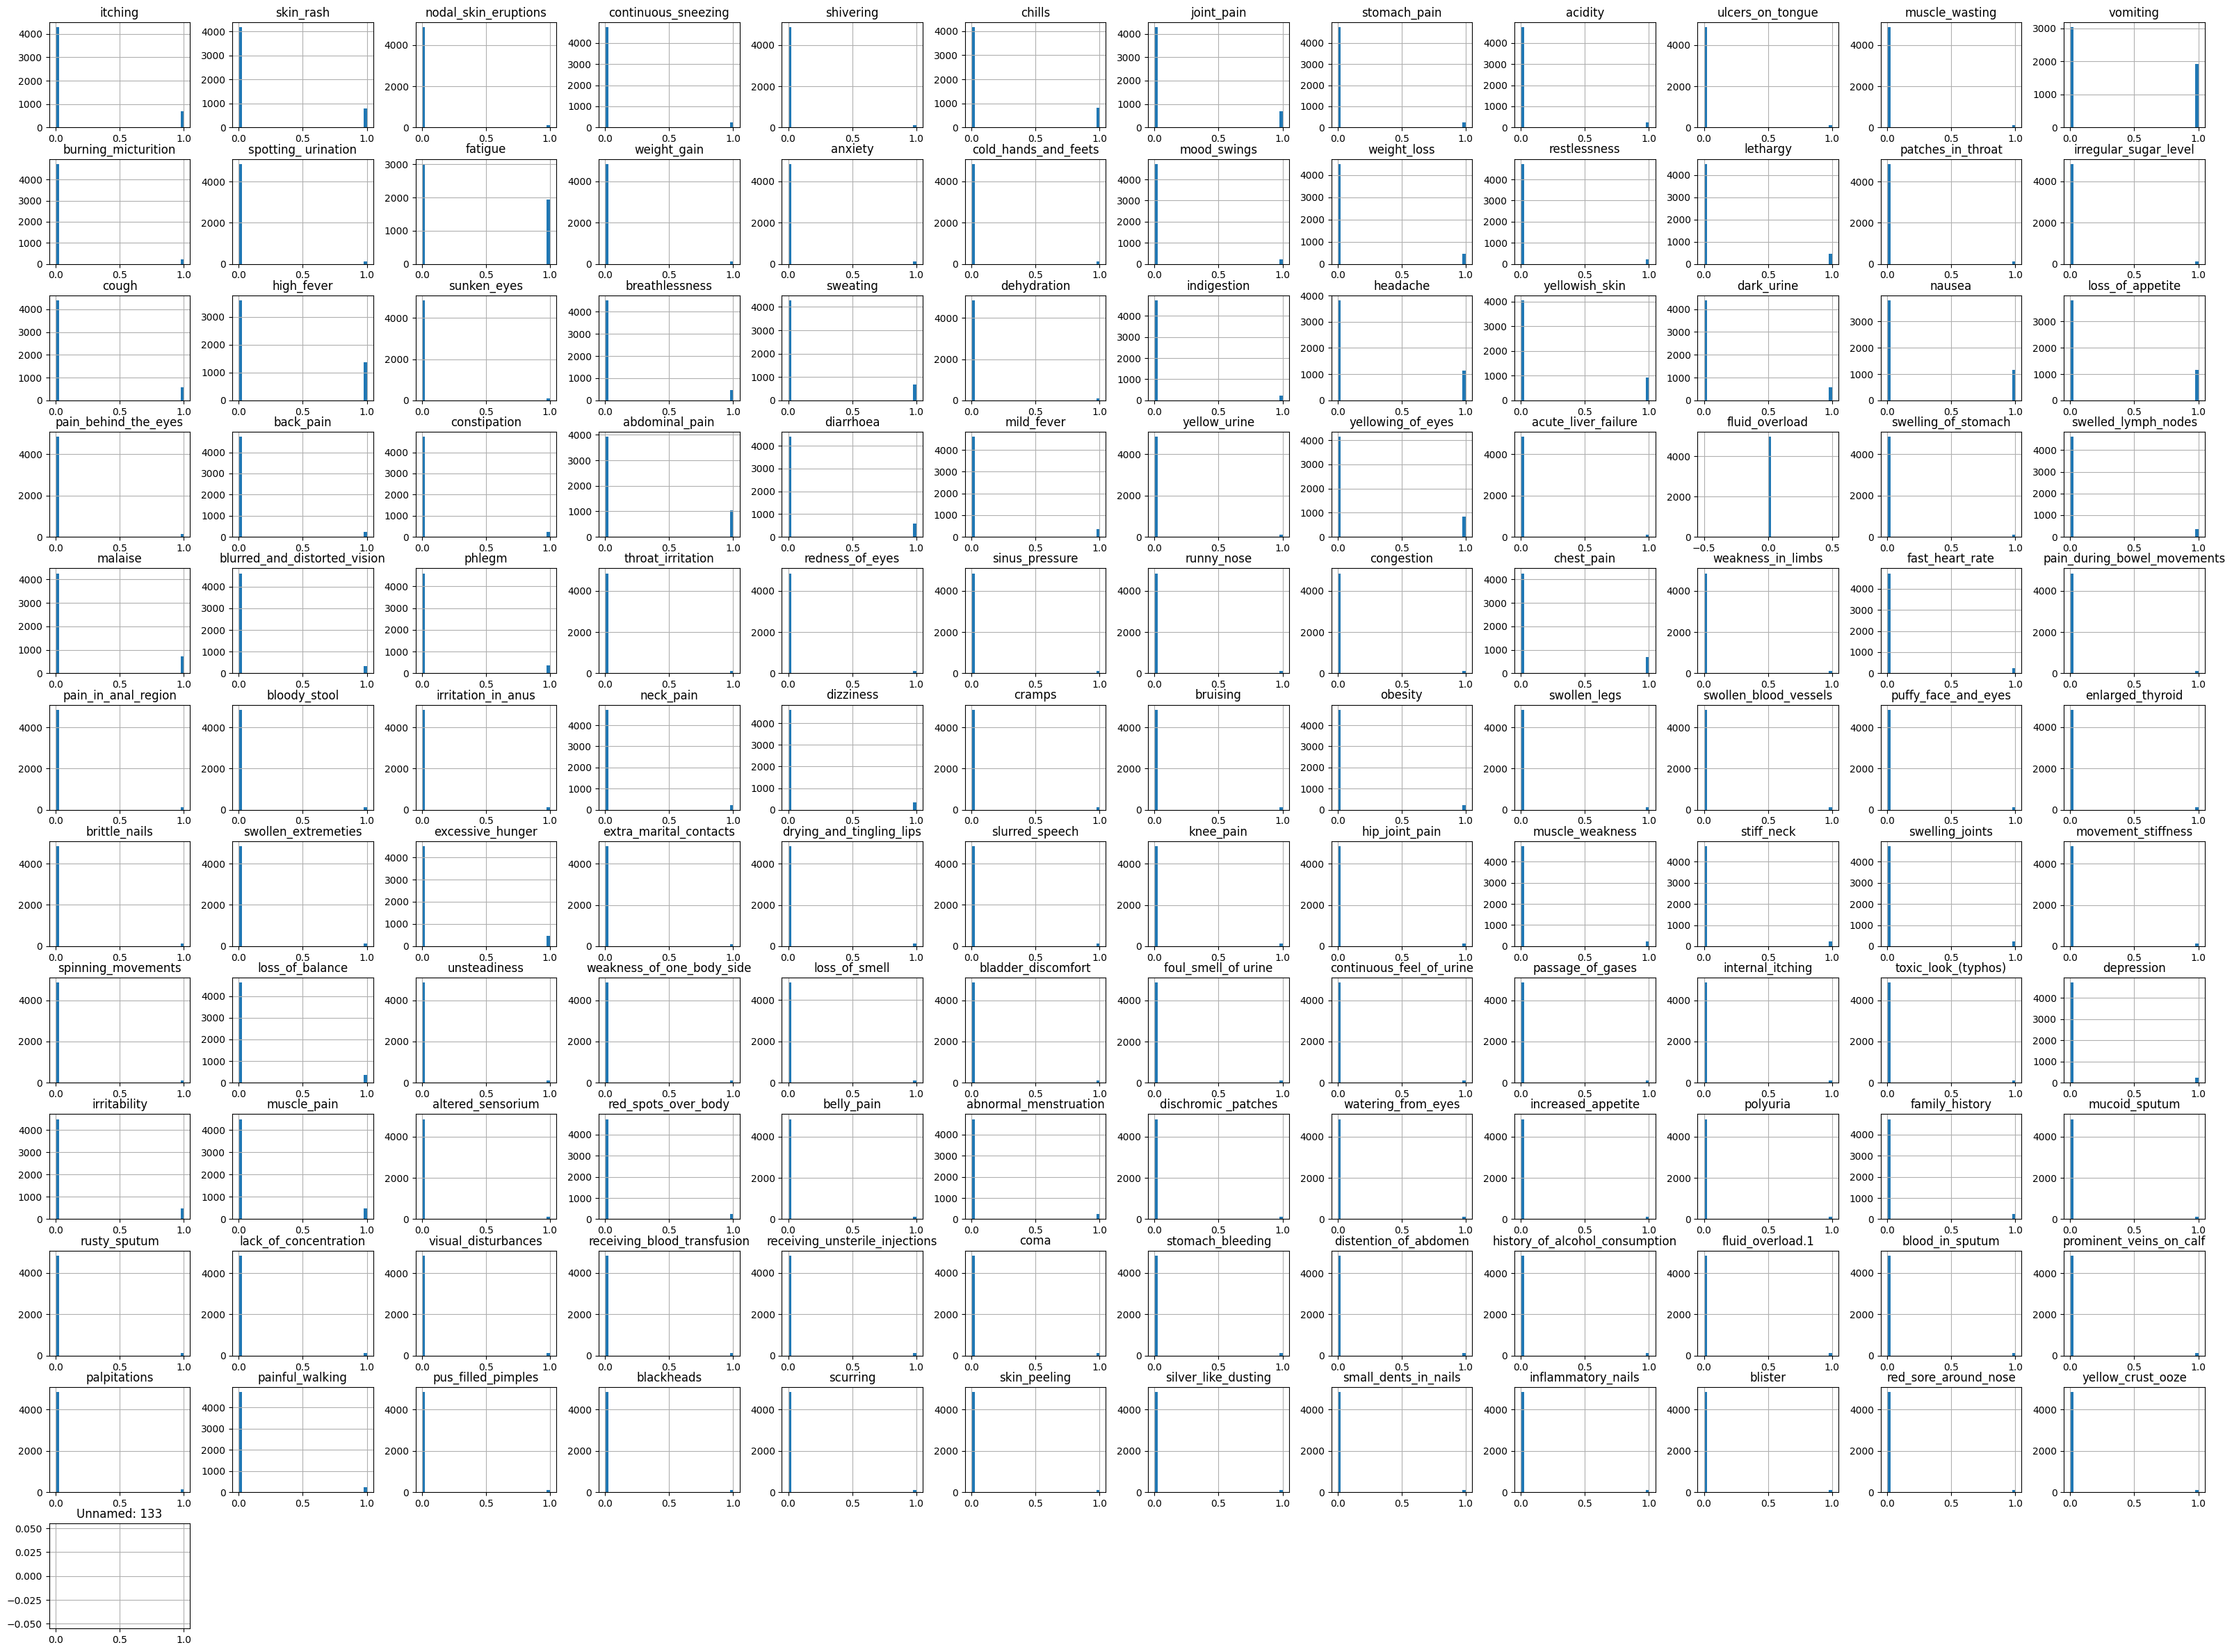

In [14]:

data.hist(bins=40, figsize=(40,30))
plt.show()

# Split The Dataset

In [15]:
x = df.drop('prognosis', axis = 1)
y = df['prognosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Models Training and Evaluation

In [16]:
# Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
tree_acc = accuracy_score(y_test, tree_pred)

print("Decision Tree Classifier:")
print("Accuracy on test set: {:.2f}%".format(tree_acc * 100))

Decision Tree Classifier:
Accuracy on test set: 100.00%


In [17]:
# Random Forest Classifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)
forest_acc = accuracy_score(y_test, forest_pred)

print("Random Forest Classifier:")
print("Accuracy on test set: {:.2f}%".format(forest_acc * 100))

Random Forest Classifier:
Accuracy on test set: 100.00%


In [18]:
# Logistic Regression Classifier
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(y_test, logreg_pred)
logreg_confidence = logreg.predict_proba(x_test)

print("Logistic Regression Classifier:")
print("Accuracy on test set: {:.2f}%".format(logreg_acc * 100))

Logistic Regression Classifier:
Accuracy on test set: 100.00%


# Saving the Model

In [19]:
import pickle

# Assuming you have a logistic regression model named 'logistic_regression_model'

# Save the model to a file using pickle
with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(logreg, file)

In [20]:
z=[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# Reshape the input data to match the number of features
z_reshaped = np.array(z).reshape(1, -1)  # Reshape z to have the same number of features as the training data

logreg_confidence = logreg.predict_proba(z_reshaped)
print(logreg_confidence)
logreg_pred = logreg.predict(z_reshaped)
print(logreg_pred)
max_confidence = max(logreg_confidence[0])
print("Maximum confidence:", max_confidence)

[[1.15063883e-03 2.54495474e-03 1.08678027e-02 1.13356343e-03
  3.33633751e-03 2.13274777e-03 1.38564869e-03 2.20609465e-03
  3.47399658e-03 4.92816114e-03 4.35736956e-04 5.34860375e-04
  9.47295483e-04 2.38286727e-03 2.71933635e-02 8.95604250e-01
  1.25363925e-03 2.77402627e-03 2.60053630e-03 1.10444587e-03
  1.09986218e-03 1.57310258e-04 2.10014822e-04 1.90664159e-03
  7.68015558e-04 5.04880790e-04 7.77928199e-04 6.76481804e-03
  2.23761612e-03 6.14357494e-04 1.13338856e-03 1.69198060e-03
  2.37239556e-03 1.28156231e-03 6.56621991e-04 4.86440585e-03
  2.13229715e-04 3.53729984e-04 2.51845376e-03 1.53346466e-03
  3.48354580e-04]]
['Fungal infection']
Maximum confidence: 0.8956042501090863


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
P = train[["prognosis"]]
X = train.drop(["prognosis"],axis=1)
Y = test.drop(["prognosis"],axis=1)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [23]:
rf= RandomForestClassifier(random_state=42)
model_rf = rf.fit(x_train,y_train)
tr_pred_rf = model_rf.predict(x_train)
ts_pred_rf = model_rf.predict(x_test)

print("training accuracy is:",accuracy_score(y_train,tr_pred_rf))
print("testing accuracy is:",accuracy_score(y_test,ts_pred_rf))

training accuracy is: 1.0
testing accuracy is: 1.0


In [24]:
test.join(pd.DataFrame(model_rf.predict(Y),columns=["predicted"]))[["prognosis","predicted"]]

,prognosis,predicted
0,Fungal infection,Fungal infection
1,Allergy,Allergy
2,GERD,GERD
3,Chronic cholestasis,Chronic cholestasis
4,Drug Reaction,Drug Reaction
5,Peptic ulcer diseae,Peptic ulcer diseae
6,AIDS,AIDS
7,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma


# Conclusion and Recommendations

The provided code demonstrates various steps in the machine learning pipeline, including data visualization, model training and evaluation, and model saving. Here are the key findings:

# Data Visualization

Data visualization was performed using pie charts to show the distribution of the 'prognosis' variable in the dataset. Additionally, a correlation heatmap was created to visualize the relationships between different features.

# Model Training and Evaluation

Three machine learning models were trained and evaluated:

* Decision Tree Classifier: Achieved 100% accuracy on the test set.
* Random Forest Classifier: Also achieved 100% accuracy on the test set.
* Logistic Regression Classifier: Achieved 100% accuracy on the test set. Confidence scores for the predictions were printed.

# Saving the Model

The trained Logistic Regression model was saved using the pickle library for future use.

# Sample Prediction

A sample input was provided, and the saved Logistic Regression model was used to make predictions. The predicted class was 'Fungal infection' with a maximum confidence score of 0.8956.

# Recommendations

While the models achieved high accuracy on the test set, it is important to further analyze the dataset and evaluate the models using appropriate metrics. Consider the specific requirements and domain knowledge to draw meaningful conclusions and make recommendations. It is also recommended to perform feature engineering, hyperparameter tuning, and cross-validation to ensure robust model performance.